In [36]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=";")

In [37]:
print(red.head())
print(white.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [38]:
# label red as 0 and white as 1
red['class'] = 0
white['class'] = 1

In [39]:
# Concatenate and check null value records
wine = pd.concat([red, white])
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


In [40]:
data = wine.drop(['class'], axis=1).values
target = wine['class'].values

In [41]:
# MinMax preprocessing
mm = MinMaxScaler()
mm.fit(data)
data_m_scaled = mm.transform(data)
print(data_m_scaled)

[[0.29752066 0.41333333 0.         ... 0.19101124 0.20289855 0.33333333]
 [0.33057851 0.53333333 0.         ... 0.25842697 0.26086957 0.33333333]
 [0.33057851 0.45333333 0.02409639 ... 0.24157303 0.26086957 0.33333333]
 ...
 [0.2231405  0.10666667 0.11445783 ... 0.13483146 0.20289855 0.5       ]
 [0.14049587 0.14       0.18072289 ... 0.08988764 0.69565217 0.66666667]
 [0.18181818 0.08666667 0.22891566 ... 0.05617978 0.55072464 0.5       ]]


In [42]:
# Standard Scale preprocessing
ss = StandardScaler()
ss.fit(data)
data_s_scaled = ss.transform(data)
print(data_s_scaled)

[[ 0.14247327  2.18883292 -2.19283252 ...  0.19309677 -0.91546416
  -0.93722961]
 [ 0.45103572  3.28223494 -2.19283252 ...  0.99957862 -0.58006813
  -0.93722961]
 [ 0.45103572  2.55330026 -1.91755268 ...  0.79795816 -0.58006813
  -0.93722961]
 ...
 [-0.55179227 -0.6054167  -0.88525328 ... -0.47897144 -0.91546416
   0.20799905]
 [-1.32319841 -0.30169391 -0.12823371 ... -1.016626    1.9354021
   1.35322771]
 [-0.93749534 -0.78765037  0.42232597 ... -1.41986693  1.09691202
   0.20799905]]


In [43]:
# MinMax Scaled Model
train_m_input, test_m_input, train_m_target, test_m_target = train_test_split(data_m_scaled, target, test_size=0.2, shuffle=True, random_state=42)
kn_m = KNeighborsClassifier()
kn_m.fit(train_m_input, train_m_target)
print(kn_m.score(test_m_input, test_m_target))

0.9884615384615385


In [44]:
# Standard Scaled Model
train_s_input, test_s_input, train_s_target, test_s_target = train_test_split(data_s_scaled, target, test_size=0.2, shuffle=True, random_state=42)
kn_s = KNeighborsClassifier()
kn_s.fit(train_s_input, train_s_target)
print(kn_s.score(test_s_input, test_s_target))

0.9876923076923076


In [45]:
# Hyper parameter tuning
params = {'n_neighbors': range(1, 20, 1),
          'weights' : ['uniform','distance'],
          'metric' : ['minkowski','euclidean','manhattan']
}

In [46]:
# Hyper parameter tuning - MinMax
gs_m = GridSearchCV(kn_m, params, n_jobs=-1)
gs_m.fit(train_m_input, train_m_target)
print(gs_m.best_params_)
print(gs_m.best_score_)
print(gs_m.score(test_m_input, test_m_target))

{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}
0.9957671947878879
0.9930769230769231


In [47]:
# Hyper parameter tuning - Standard Scaled|
gs_s = GridSearchCV(kn_s, params, n_jobs=-1)
gs_s.fit(train_s_input, train_s_target)
print(gs_s.best_params_)
print(gs_s.best_score_)
print(gs_s.score(test_s_input, test_s_target))

{'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'distance'}
0.9961518101725032
0.9930769230769231


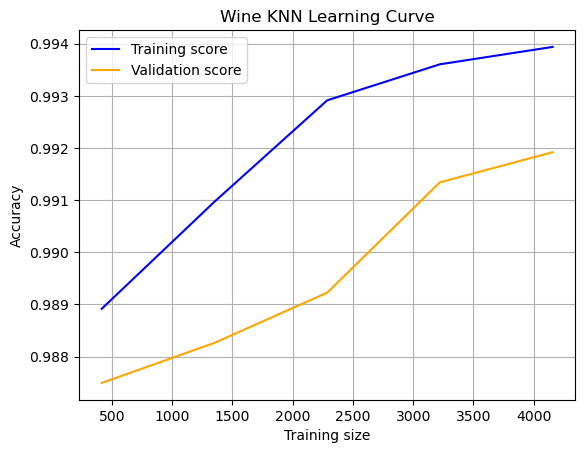

In [55]:
train_sizes, train_scores, test_scores = learning_curve(
    KNeighborsClassifier(),
    train_m_input,
    train_m_target,
    n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.grid()
plt.title('Wine KNN Learning Curve', loc='center')
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.plot(train_sizes, train_scores_mean, color='blue', label="Training score")
plt.plot(train_sizes, test_scores_mean, color='orange', label="Validation score")
plt.legend(['Training score', 'Validation score'])
plt.savefig('graph\\wine_knn_lc.png', format='png')
plt.show()

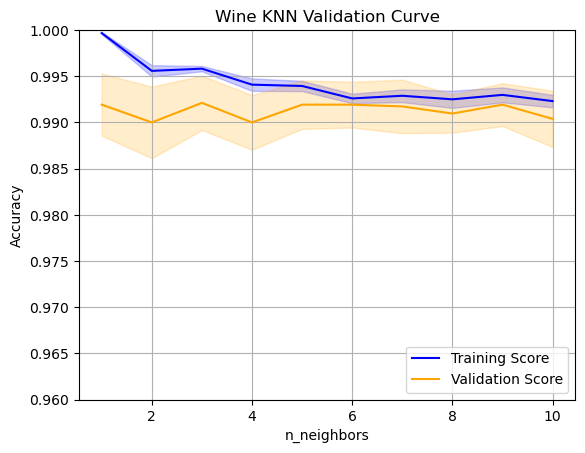

In [56]:
param_name = "n_neighbors"
param_range = range(1, 11, 1)

train_scores, valid_scores = validation_curve(
    KNeighborsClassifier(), train_m_input, train_m_target, param_name=param_name,
    param_range=param_range, cv=5
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(valid_scores, axis=1)
test_std = np.std(valid_scores, axis=1)

plt.plot(param_range, train_mean, color='blue', label='Training Score')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.2, color='blue')

plt.plot(param_range, test_mean, color='orange', label='Validation Score')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.2, color='orange')

plt.grid()
plt.title('Wine KNN Validation Curve', loc='center')
plt.legend(loc='lower right')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.ylim([0.96, 1.00])
plt.savefig('graph\\wine_knn_vc.png', format='png')
plt.show()